In [164]:
import pandas as pd
import geopandas as gpd
import geodatasets
birds_df = pd.read_csv('purple_martin.csv')
birds_gdf = gpd.GeoDataFrame(birds_df, 
                       
                            geometry=gpd.points_from_xy(birds_df['location-long'], birds_df['location-lat']),
                            crs="EPSG:4326")

In [165]:
# world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
world = gpd.read_file('natural-earth-countries-1_110m.geojson')
north_america = ['Greenland', 'Canada', 'United States of America', 'Mexico']
south_america = ["Argentina","Bolivia","Brazil","Chile", "Colombia",
"Ecuador", "French Guiana", "Guyana", "Paraguay", "Peru",
"Suriname", "Uruguay","Venezuela"]
americas_countries = north_america + south_america
americas = world.loc[world.sovereignt.isin(americas_countries)]

<Axes: >

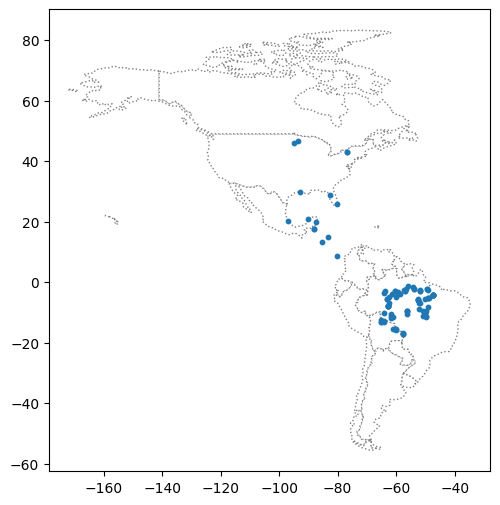

In [166]:
ax = americas.plot(figsize=(8,6), color='white', linestyle=':', edgecolor='gray')

birds_gdf.plot(ax=ax, markersize=10)


In [191]:
from shapely.geometry import LineString

path_df = birds_gdf.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry, crs="EPSG:4326")

start_df = birds_gdf.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry, crs="EPSG:4326")

end_df = birds_gdf.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry, crs="EPSG:4326")

<Axes: >

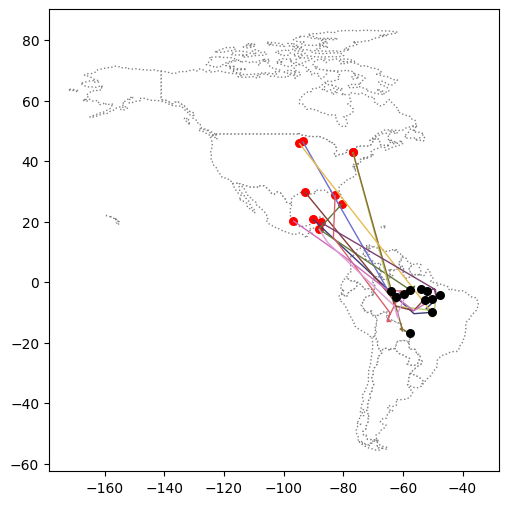

In [207]:
ax = americas.plot(figsize=(8,6), color='white', linestyle=':', edgecolor='gray')

start_gdf.plot(ax=ax, color='red',  markersize=30)
path_gdf.plot(ax=ax, cmap='tab20b', linestyle='-', linewidth=1, zorder=1)
end_gdf.plot(ax=ax, color='black', markersize=30)

In [221]:
americas[americas.sovereignt == 'Paraguay'].geometry.to_crs(epsg=3035).area.sum()/10**6

np.float64(400784.2378161458)